### Imports

In [1]:
import torch
import os
import re

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
from natsort import natsorted
from torchvision import models
from sklearn.model_selection import train_test_split

In [2]:
#from google.colab import drive
BASE_FOLDER = os.getcwd()
print(BASE_FOLDER)
#drve.mount(os.path.join(BASE_FOLDER, "drive"))

c:\Users\Eddy\Desktop\LymphomAug


In [3]:
#import zipfile
#zipf = zipfile.ZipFile(os.path.join(BASE_FOLDER, "drive", "MyDrive", "data.zip"))
#zipf.extractall(os.path.join(BASE_FOLDER, "data"))
#zipf.close()

### Creating the pytorch dataset

In [4]:
class LymphomaDataset(Dataset):
    def __init__(self, image_folder, label_folder, use_augmented, aug_img_folder, aug_label_folder, transform=None):
        self.image_folder = image_folder
        self.label_folder = label_folder
        self.transform = transform
        self.using_aug = use_augmented
        self.aug_img_folder = aug_img_folder
        self.aug_label_folder = aug_label_folder

        self.image_paths = natsorted([os.path.join(image_folder, f) for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))])
        if self.using_aug:
          self.aug_image_paths = natsorted([os.path.join(aug_img_folder, f) for f in os.listdir(aug_img_folder) if os.path.isfile(os.path.join(aug_img_folder, f))])
          self.all_image_paths = self.image_paths + self.aug_image_paths
          print(self.aug_image_paths)
          print(self.all_image_paths)

        self.label_paths = natsorted([os.path.join(label_folder, f) for f in os.listdir(label_folder) if os.path.isfile(os.path.join(label_folder, f))])
        if self.using_aug:
          self.aug_label_paths = natsorted([os.path.join(aug_label_folder, f) for f in os.listdir(aug_label_folder) if os.path.isfile(os.path.join(aug_label_folder, f))])
          self.all_label_paths = self.label_paths + self.aug_label_paths

          print(self.all_label_paths)


    def __len__(self):
        return len(self.all_image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.all_image_paths[idx]).convert("RGB")
        label = int(self.read_label_file(self.all_label_paths[idx]))

        if self.transform:
            image = self.transform(image)

        return image, label

    def read_label_file(self, label_path):
        # Implement logic to read labels from label files
        # For example, if labels are in text files, you can use:
        with open(label_path, 'r') as file:
            label = file.read().strip()  # Adjust based on your label format
        return label

# Replace 'your_image_folder' and 'your_label_folder' with the actual paths
base_folder = os.getcwd()
image_folder = os.path.join(base_folder, "data", "images")
augmented_image_folder = os.path.join(base_folder, "data", "augmented_images")
label_folder = os.path.join(base_folder, "data", "labels")
augmented_label_folder = os.path.join(base_folder, "data", "augmented_labels")

#TRY THE ROTATION OF THE IMAGES
#from PIL import Image
#import os

# Define the rotation angle
#angle = 45  # Rotate by a specific angle

# Create a new folder for rotated images if it doesn't exist
#output_folder_name = f"rotated_images_{angle}"
#output_folder_path = os.path.join(base_folder, "data/images", output_folder_name)
#if not os.path.exists(output_folder_path):
#    os.makedirs(output_folder_path)
#else:
#    os.system(f"rm {output_folder_path}/*")
#
#
#
#
#for image_name in os.listdir(image_folder):
#    if image_name.lower().endswith('.png'):
#        # Load the image
#        img_path = os.path.join(image_folder, image_name)
#        img = Image.open(img_path)

        # Rotate the image without cropping (expand = True)
        # If i use expand=True the image change is size for be view correctly.
        # Else if expand=False the #pixels remains the original and the image's corners are cutted
        # CHOOSE WHAT TO DO
#        rotated_img = img.rotate(angle, expand=True, fillcolor=(0, 0, 0))

        # Define the path to save the rotated image
#       save_path = os.path.join(output_folder_path, f"rotate{angle}_{image_name}")

        # Save the rotated image
#        rotated_img.save(save_path)

#        print(f"Rotated image saved to: {save_path}")

# Define transformation (optional, you can customize it based on your needs)
transform = transforms.Compose([
    transforms.Resize((500, 500)),
    transforms.ToTensor(),
])

# Instantiate the custom dataset
dataset = LymphomaDataset(image_folder, label_folder, True, augmented_image_folder, augmented_label_folder, transform=transform)

batch_size = 128

# Create DataLoader
# dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
train_dataset, test_dataset = train_test_split(dataset, test_size=0.3, random_state=1)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Access a sample from the dataset
sample_index = 200
sample_image, sample_label = dataset[sample_index]

# Print information about the sample
print(f"Sample {sample_index} - Image: {sample_image.size()}, Label: {sample_label}")


['c:\\Users\\Eddy\\Desktop\\LymphomAug\\data\\augmented_images\\374.png', 'c:\\Users\\Eddy\\Desktop\\LymphomAug\\data\\augmented_images\\375.png', 'c:\\Users\\Eddy\\Desktop\\LymphomAug\\data\\augmented_images\\376.png', 'c:\\Users\\Eddy\\Desktop\\LymphomAug\\data\\augmented_images\\377.png', 'c:\\Users\\Eddy\\Desktop\\LymphomAug\\data\\augmented_images\\378.png', 'c:\\Users\\Eddy\\Desktop\\LymphomAug\\data\\augmented_images\\379.png', 'c:\\Users\\Eddy\\Desktop\\LymphomAug\\data\\augmented_images\\380.png', 'c:\\Users\\Eddy\\Desktop\\LymphomAug\\data\\augmented_images\\381.png', 'c:\\Users\\Eddy\\Desktop\\LymphomAug\\data\\augmented_images\\382.png', 'c:\\Users\\Eddy\\Desktop\\LymphomAug\\data\\augmented_images\\383.png', 'c:\\Users\\Eddy\\Desktop\\LymphomAug\\data\\augmented_images\\384.png', 'c:\\Users\\Eddy\\Desktop\\LymphomAug\\data\\augmented_images\\385.png', 'c:\\Users\\Eddy\\Desktop\\LymphomAug\\data\\augmented_images\\386.png', 'c:\\Users\\Eddy\\Desktop\\LymphomAug\\data\\augme

### Creating the AlexNet

In [5]:
class AlexNet(nn.Module):
    def __init__(self, num_classes: int = 1000, dropout: float = 0.5) -> None:
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(p=dropout),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(p=dropout),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x
    

# alexnet = AlexNet(num_classes = 3)
alexnet = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)
# alexnet.eval()

Using cache found in C:\Users\Eddy/.cache\torch\hub\pytorch_vision_v0.10.0
C:\Users\Eddy\AppData\Roaming\Python\Python312\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Eddy\AppData\Roaming\Python\Python312\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


### Training loop

True
Training - Epoch: 1, Training loss: 4.4241, Training accuracy: 0.3244
Training - Epoch: 2, Training loss: 1.3393, Training accuracy: 0.3465
Training - Epoch: 3, Training loss: 1.0787, Training accuracy: 0.4269
Training - Epoch: 4, Training loss: 0.9939, Training accuracy: 0.4862
Training - Epoch: 5, Training loss: 0.9510, Training accuracy: 0.5354
Training - Epoch: 6, Training loss: 1.0093, Training accuracy: 0.4752
Training - Epoch: 7, Training loss: 0.8958, Training accuracy: 0.5604
Training - Epoch: 8, Training loss: 0.9844, Training accuracy: 0.5205
Training - Epoch: 9, Training loss: 0.9673, Training accuracy: 0.5227
Training - Epoch: 10, Training loss: 0.8610, Training accuracy: 0.5964
Training - Epoch: 11, Training loss: 0.8964, Training accuracy: 0.5587
Training - Epoch: 12, Training loss: 0.8224, Training accuracy: 0.5985
Training - Epoch: 13, Training loss: 0.7964, Training accuracy: 0.6209
Training - Epoch: 14, Training loss: 0.7913, Training accuracy: 0.6099
Training -

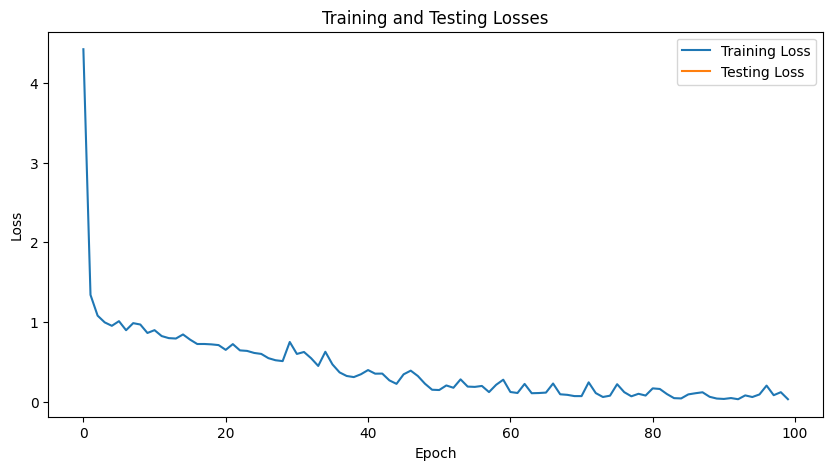

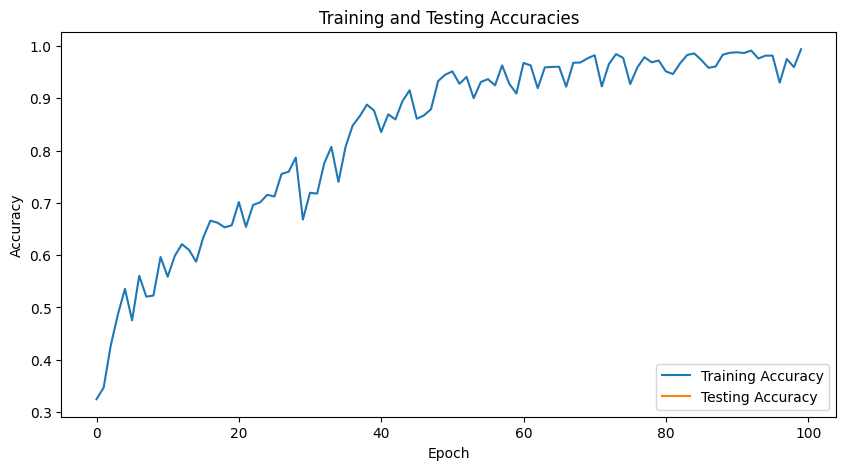

In [6]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(alexnet.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.Adam(alexnet.parameters(), lr=0.001, weight_decay=0.001)

num_epochs = 100
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(torch.cuda.is_available())

alexnet.to(device) # alexnet to the device, gpu if available

train_losses = []
test_losses = []

train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    # Set the model to training mode
    alexnet.train()

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = alexnet(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Update running statistics
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    # Calculate training accuracy and loss for the epoch
    train_accuracy = correct_predictions / total_samples
    average_train_loss = running_loss / len(train_loader)

    train_losses.append(average_train_loss)
    train_accuracies.append(train_accuracy)

    print(f'Training - Epoch: {epoch + 1}, Training loss: {average_train_loss:.4f}, Training accuracy: {train_accuracy:.4f}')

test_loss = 0.0
correct_predictions = 0
total_samples = 0

alexnet.eval()

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = alexnet(inputs)
        loss = criterion(outputs, labels)

        # Update running statistics
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)

test_accuracy = correct_predictions / total_samples
average_test_loss = test_loss / len(test_loader)

print(f'Test - Test loss: {average_test_loss:.4f}, Test accuracy: {test_accuracy:.4f}')

test_losses.append(average_test_loss)
test_accuracies.append(test_accuracy)

# Plot training and testing losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Losses')
plt.legend()
plt.show()

# Plot training and testing accuracies
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(test_accuracies, label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracies')
plt.legend()
plt.show()